# Estudio Inmobiliario de Lisboa

Instalamos las librerías necesarias

In [3]:
%pip install --quiet numpy
%pip install --quiet pandas
%pip install --quiet matplotlib

%pip install --quiet seaborn
%pip install --quiet scipy
%pip install --quiet fitter


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note

Importamos las librerias necesarias y el dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import scipy.stats as stats

# Leer el archivo CSV
data = pd.read_csv('portugal_housing.csv')

/var/folders/jr/_dyjstd10fx0jjbz81clpyrh0000gn/T/ipykernel_5872/909917215.py:10: DtypeWarning: Columns (6,7,9,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('portugal_housing.csv')


In [43]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Descripción los datos


Este [dataset](https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024) contiene más de 100,000 precios reales de oferta para propiedades inmobiliarias listadas en sitios web de bienes raíces en Portugal. Los datos se obtuvieron de manera legal y ética mediante web scraping de varias plataformas en línea, asegurando el cumplimiento de los términos y condiciones de dichas plataformas.

El conjunto de datos incluye información detallada sobre cada propiedad listada, tales como:

- **Precio**: El precio de oferta de la propiedad en euros.
- **Distrito, Ciudad, Pueblo**: La ubicación geográfica de la propiedad, permitiendo un análisis regional.
- **Tipo**: El tipo de propiedad (por ejemplo, Apartamento, Casa, Garaje, Terreno).
- **Certificado Energético**: La calificación de eficiencia energética de la propiedad, según los estándares de certificación energética en Portugal.
- **Medidas de Área**: Varias columnas relacionadas con el tamaño y la superficie de la propiedad, incluyendo:
  - **Área Bruta Privada**: El área bruta privada de la propiedad.
  - **Área Útil**: El área que puede ser utilizada para habitar.
  - **Área Habitable**: El espacio realmente habitable dentro de la propiedad.
  - **Tamaño del Terreno**: La superficie del terreno asociada a la propiedad.
  - **Área Construida**: La superficie total construida de la propiedad.
- **Habitaciones, Dormitorios, Baños, Aseos**: Desglose detallado del número de habitaciones, dormitorios, baños y aseos en la propiedad.
- **Planta**: La planta en la que se encuentra la propiedad.
- **Estacionamiento, Garaje**: Información sobre la disponibilidad de estacionamiento y la presencia de un garaje.
- **Características Adicionales**: Si la propiedad incluye comodidades como ascensores o estaciones de carga para coches eléctricos.
- **Año de Construcción**: El año en que se construyó la propiedad.
- **Fecha de Publicación**: La fecha en que se publicó el anuncio.

El conjunto de datos es adecuado para una variedad de análisis, incluyendo:

- **Tendencias de precios**: Comprender la relación entre ubicación, características de las propiedades y precios de oferta.
- **Eficiencia energética**: Investigar cómo afecta la certificación energética al valor de las propiedades.
- **Análisis geográfico**: Explorar las diferencias regionales en los precios inmobiliarios a lo largo de Portugal.

Este conjunto de datos ofrece una visión completa del mercado inmobiliario portugués, permitiendo a los usuarios obtener información sobre los precios actuales, tipos de propiedades y factores geográficos que influyen en el mercado.

El objetivo de este Notebook es realizar un análisis estadístico de los datos, no una preparación de los mismos.

## Limpieza del dataset

Antes de empezar con el análisis haremos una limpieza rápida del dataset, para ello eliminaremos los elementos duplicados, así como todas aquellas filas que no tengan un valor de "price".

In [39]:
print("Elementos duplicados:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

print("Filas con precio nulo:", data["Price"].isnull().sum())
data.dropna(subset=["Price"], inplace=True)

Elementos duplicados: 0
Filas con precio nulo: 0


# Descriptiva univariante y bivariante 

En el conjunto de datos proporcionado, las variables pueden clasificarse de la siguiente manera:

**Variables categóricas**

- **Nominativas**
  - `District` (Distrito)
  - `City` (Ciudad)
  - `Town` (Pueblo)
  - `Type` (Tipo de propiedad)
  - `EnergyCertificate` (Certificado Energético)
  - `Floor` (Piso)
  - `Lift` (Ascensor)
  - `HasParking` (Tiene estacionamiento)
  - `PublishDate` (Fecha de publicación)
  - `Garage` (Garaje)
  - `Elevator` (Ascensor)
  - `ElectricCarsCharging` (Cargador de coches eléctricos)
  - `ConservationStatus` (Estado de conservación)

- **Ordinales**
  - No existen variables ordinales en este dataset
<br><br>

**Variables cuantitativas**

- **Discretas**
  - `Price` (Precio)
  - `TotalRooms` (Número total de habitaciones)
  - `NumberOfBedrooms` (Número de dormitorios)
  - `NumberOfBathrooms` (Número de baños)
  - `NumberOfWC` (Número de aseos)
  - `BuiltArea` (Área construida)

- **Continuas**
  - `Parking` (Capacidad de estacionamiento)
  - `ConstructionYear` (Año de construcción)
  - `TotalArea` (Área total)
  - `GrossArea` (Área bruta)
  - `LivingArea` (Área habitable)
  - `LotSize` (Tamaño del terreno)

In [41]:
variables_categoricas_nominativas = ["District", "City", "Town", "Type", "EnergyCertificate", "Floor", "Lift", "HasParking", "PublishDate", "Garage", "Elevator", "ElectricCarsCharging", "ConservationStatus"]
variables_cuantitativas_discretas = ["Price", "TotalRooms", "NumberOfBedrooms", "NumberOfBathrooms", "NumberOfWC", "BuiltArea"]
variables_cuantitativas_continuas = ["Floor", "Parking", "ConstructionYear", "TotalArea", "GrossArea", "LivingArea", "LotSize"]

## Descriptiva univariante 

### Variables Cuántitativas 

In [9]:
data.describe()

,Price,Parking,ConstructionYear,TotalArea,GrossArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
count,1.080350e+05,107889.000000,70164.000000,1.018210e+05,2.599300e+04,61396.000000,29162.000000,39519.000000,8.231000e+04,2.769300e+04,1.749200e+04,102897.000000
mean,3.696839e+05,0.575916,1988.328545,6.413295e+05,2.930126e+03,3.126148,2.681298,0.406868,1.575916e+03,7.268750e+04,3.791519e+03,1.499626
std,4.246609e+06,0.881442,26.659596,1.925369e+08,1.189573e+05,11.386343,1.911254,1.030176,3.858638e+04,6.197125e+06,1.438524e+05,1.717067
min,1.000000e+02,0.000000,1900.000000,-7.196067e+06,-7.000000e+00,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-13.000000
25%,7.850000e+04,0.000000,1971.000000,9.500000e+01,1.000000e+02,2.000000,2.000000,0.000000,8.000000e+01,3.000000e+02,1.072000e+02,0.000000
50%,1.999000e+05,0.000000,1993.000000,1.780000e+02,1.630000e+02,3.000000,3.000000,0.000000,1.210000e+02,8.120000e+02,1.780000e+02,1.000000
75%,3.900000e+05,1.000000,2008.000000,6.450000e+02,2.960000e+02,4.000000,3.000000,0.000000,2.160000e+02,3.372000e+03,3.250000e+02,2.000000
max,1.380000e+09,3.000000,2024.000000,6.142007e+10,1.275000e+07,2751.000000,21.000000,59.000000,5.429000e+06,9.923010e+08,1.275000e+07,90.000000


- **Precio** (discreta): vemos que la medía (3,6e+10^5) está lejos de la mediana (2e+10^5). El rango es muy amplio, vemos un máximo muy lejos de donde parecen encontrarse la mayoría de datos. 
- **Parking** (continua): La mayoría de propiedades no tienen parking
- **ConstrucctionYear** (continua): un rango de 1988 a 2024
- **TotalArea** (continua): un comportamiento parecido al precio, la media bastante por encima de la mediana. Y un máximo muy lejos de la mayoría de los datos. Parece que hay datos anómalos, el mínimo en negativo. 
- **TotalRooms** (discreta): Las propiedades tienen una media de 3 habitacinoes y parece que hay algún dato muy lejos del resto. 
- **NumberOfWC** (discreta): Una media de 0.4 baños. Es un dato que está poco informado
- **LivingArea** (continua): comportamiento aprecido a los precio y la TotalArea
- **LotSize** (continua):
- **BuiltArea** (discreta): 
- **NumberOfBathrooms** (discreta): 

### Variables Categóricas

Vamos a ver como se distribuyen las variables categóricas. Se han cambiado los nulos por 'Sin asignar' para poder ver la cantidad de nulos en cada columna. 
Para las variables City y Town no se muestra el histograma puesto que no es relevante. 
Todas las variables son categóricas a excepción de Energy Certificate, Status y Floor que se podrían considerar ordinales. 

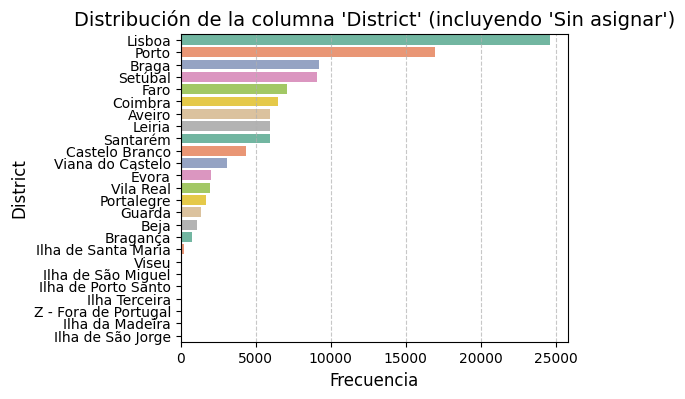

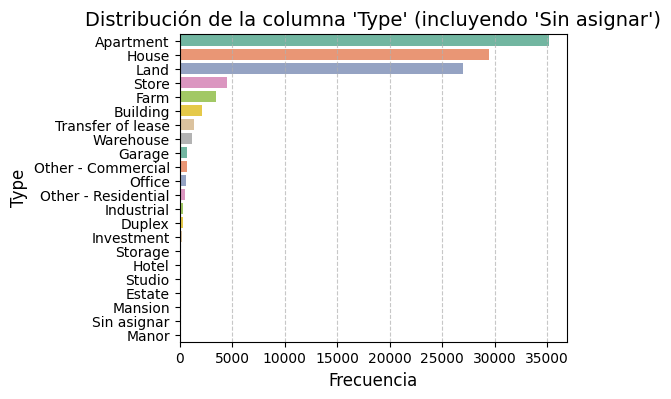

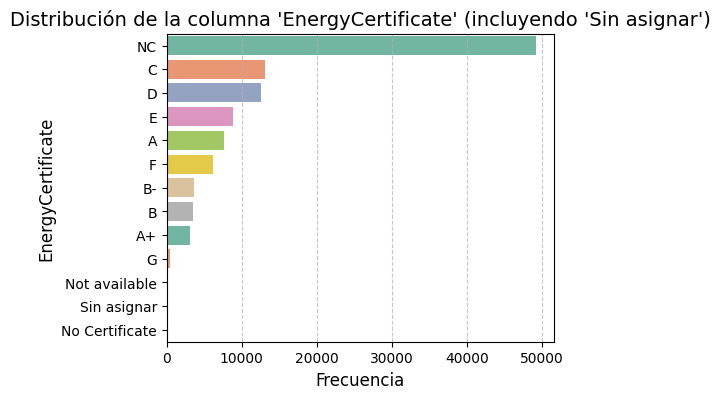

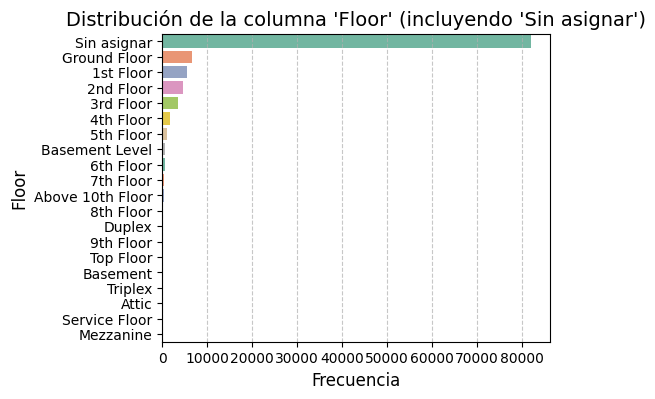

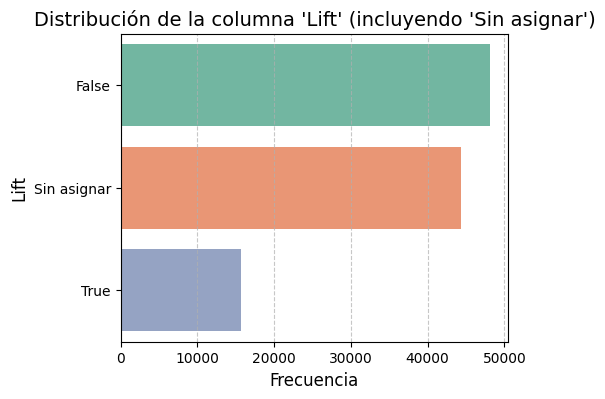

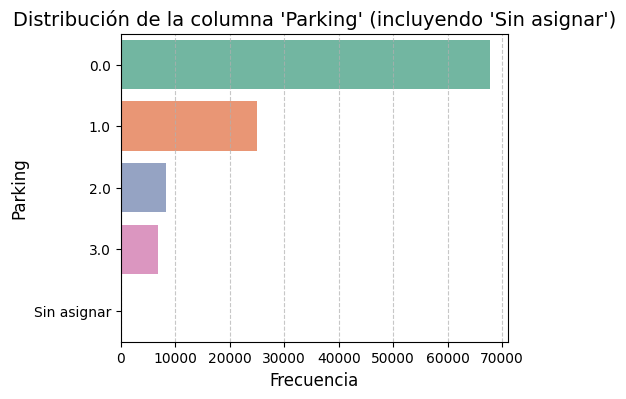

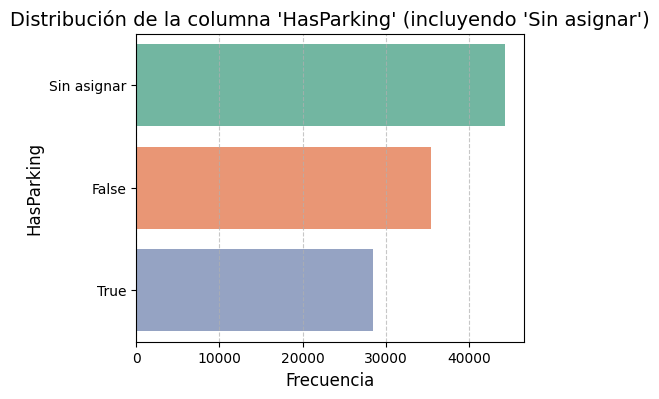

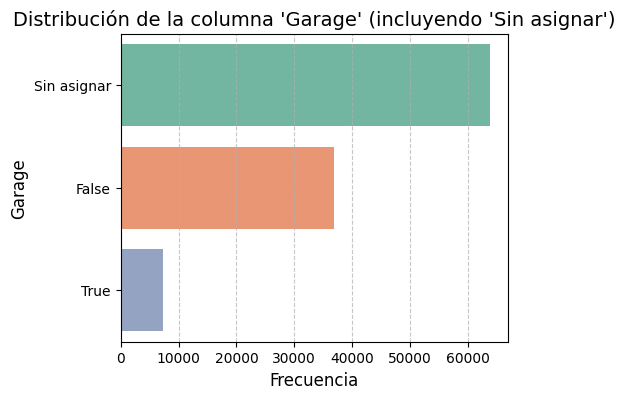

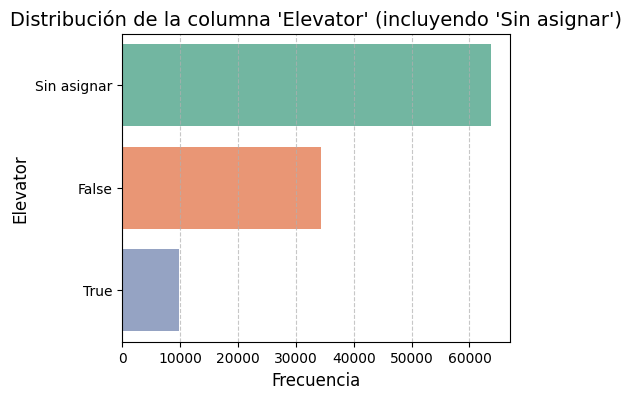

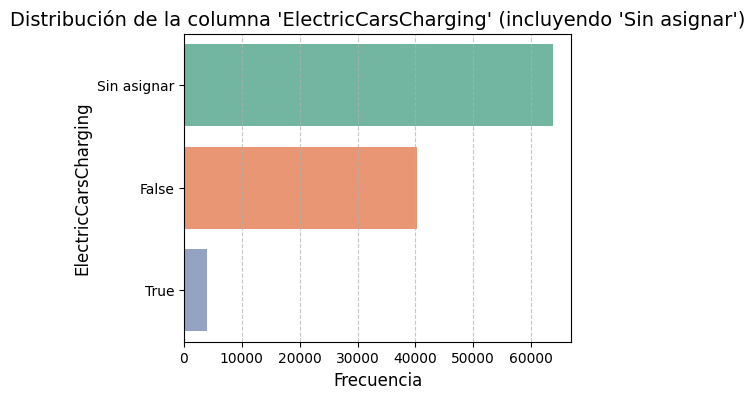

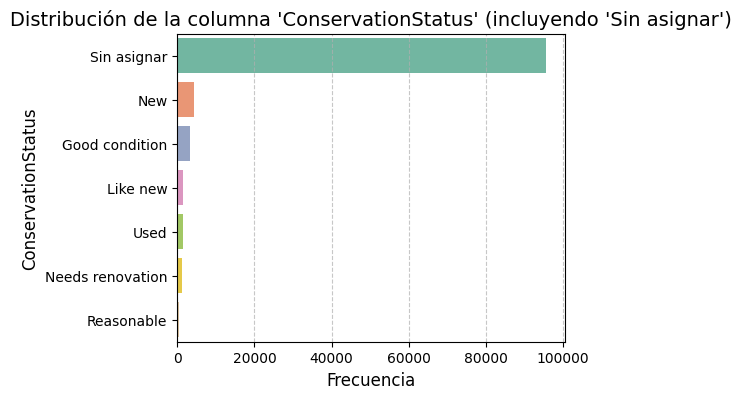

In [10]:

# Reemplazar valores nulos por "Sin asignar" para las columnas categóricas
categorical_columns = [
    'District',  'Type', 'EnergyCertificate', 'Floor', 
    'Lift', 'Parking', 'HasParking', 'Garage', 'Elevator', 
    'ElectricCarsCharging', 'ConservationStatus'
]

data_filled = data.copy()  # Crear una copia para no modificar el dataset original
data_filled[categorical_columns] = data_filled[categorical_columns].fillna("Sin asignar")

# Graficar cada columna con la categoría "Sin asignar"
for col in categorical_columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=data_filled, y=col, palette='Set2', order=data_filled[col].value_counts().index)
    plt.title(f"Distribución de la columna '{col}' (incluyendo 'Sin asignar')", fontsize=14)
    plt.xlabel("Frecuencia", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# 'City', 'Town',

## Descriptiva bivariante

### Análisis de variables 

### Comportamiento del precio según el tipo de propiedad

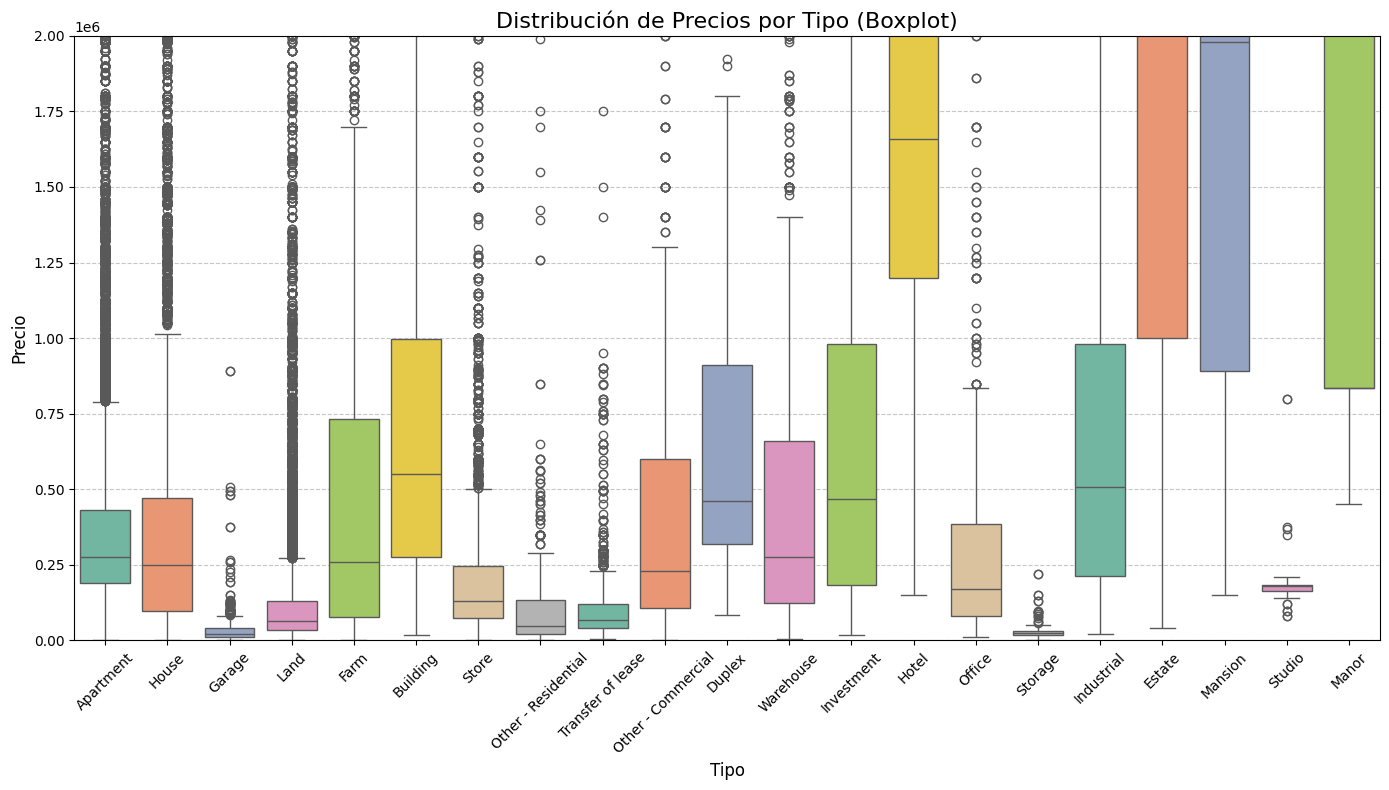

In [11]:
# Crear el diagrama de caja (boxplot)
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x="Type", y="Price", palette="Set2")

# Personalizar el gráfico
plt.title("Distribución de Precios por Tipo (Boxplot)", fontsize=16)
plt.xlabel("Tipo", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas si hay muchas categorías
plt.ylim(0, 2000000)  # Establecer el límite superior en 2,000,000

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos observar que el precio varía significativamente según el tipo de propiedad. Más adelante, evaluaremos si las diferencias entre los precios de algunos tipos de propiedades son estadísticamente significativas.

In [12]:
data_reduced = data[data["Price"] < 1102920]

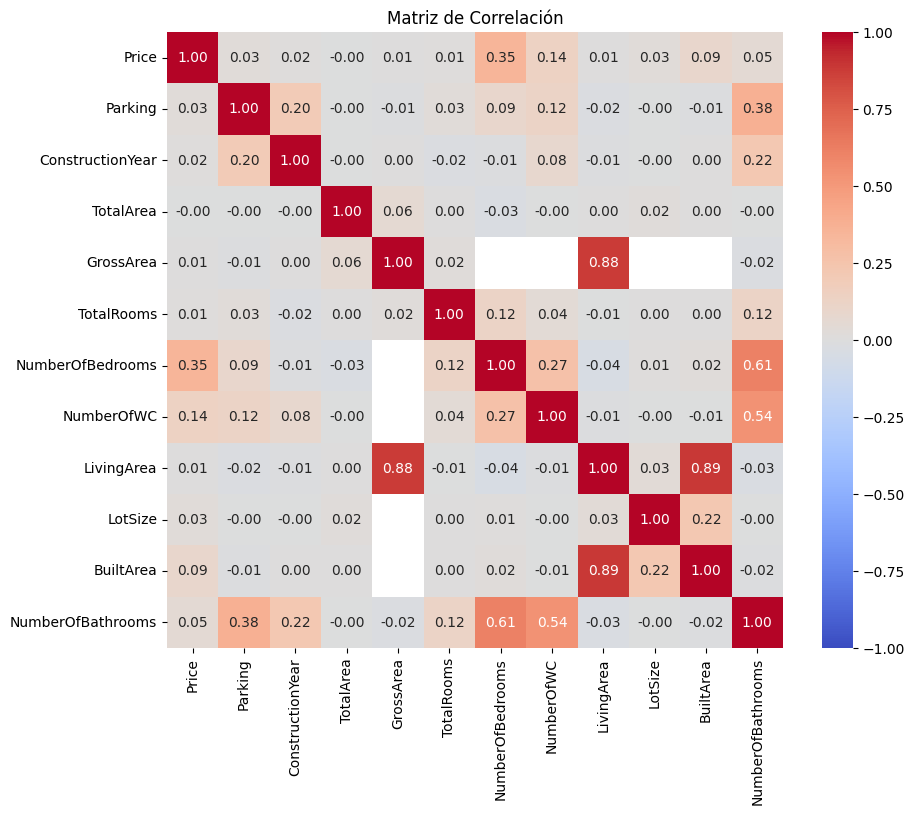

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr(method='pearson')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, fmt=".2f")

# Añadir título
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()


Para enfocar el estudio y lograr mayor precisión, centraremos el análisis en propiedades cuyo coste sea inferior a 1.102.920 €. Este umbral corresponde al precio a partir del cual se aplica el porcentaje más alto de impuestos en Portugal, considerando que estas propiedades no se clasifican como de alto standing. Este enfoque nos permitirá obtener conclusiones más relevantes para la mayoría de los inmuebles.
![Cotización](img/cotizacion.png)


In [14]:
data_reduced = data[data["Price"] < 1102920]

# Estudio de la normalidad de los datos
- Análisis
- Hitograma
- Simetría (media/mediana/skewness)
- Diagrama de cajas
- Q-Q plot
- Test de normalidad

## Análisis de la distribución de distintas columnas

Añadir narrativa sobre lo que se está haciendo para saber si es normal o no y que conclusiones tenermos. (dejaría el seguno método, el fitter. Me parece más limpio) + Añadir esto mismo que hemos hecho para el precio pero para una variable que sepamos que sigue un adistribución normal. Para ver que tal y como salen los numeros y los tests. 

In [15]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

resultados_distribucion = {}

distribuciones = {
    'normal': stats.norm,
    'lognormal': stats.lognorm,
    'exponencial': stats.expon,
    'gamma': stats.gamma,
    'beta': stats.beta
}

for column in numerical_data.columns:
    # Asegurarse de que la columna no tenga valores nulos o infinitos
    cleaned_data = numerical_data[column].replace([np.inf, -np.inf], np.nan).dropna()

    if len(cleaned_data) > 0:  # Solo proceder si hay datos válidos
        resultados = {}

        for nombre, distribucion in distribuciones.items():
            try:
                # Ajustar la distribución a los datos
                params = distribucion.fit(cleaned_data)

                D, p_value = stats.kstest(cleaned_data, distribucion.cdf, args=params)

                resultados[nombre] = p_value
            except Exception as e:
                print(f"Error al ajustar la distribución {nombre} para la variable {column}: {e}")


        if resultados:
            mejor_distribucion = max(resultados, key=resultados.get)
            resultados_distribucion[column] = mejor_distribucion

for variable, distribucion in resultados_distribucion.items():
    print(f'La variable "{variable}" se ajusta mejor a la distribución: {distribucion}')

/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np

La variable "Price" se ajusta mejor a la distribución: lognormal
La variable "Parking" se ajusta mejor a la distribución: normal
La variable "ConstructionYear" se ajusta mejor a la distribución: normal
La variable "TotalArea" se ajusta mejor a la distribución: normal
La variable "GrossArea" se ajusta mejor a la distribución: normal
La variable "TotalRooms" se ajusta mejor a la distribución: normal
La variable "NumberOfBedrooms" se ajusta mejor a la distribución: normal
La variable "NumberOfWC" se ajusta mejor a la distribución: normal
La variable "LivingArea" se ajusta mejor a la distribución: normal
La variable "LotSize" se ajusta mejor a la distribución: normal
La variable "BuiltArea" se ajusta mejor a la distribución: lognormal
La variable "NumberOfBathrooms" se ajusta mejor a la distribución: normal


2024-11-28 19:44:46.761 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-11-28 19:44:47.324 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.0)
2024-11-28 19:44:47.389 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=0.0)
2024-11-28 19:44:47.592 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.0)
2024-11-28 19:44:47.600 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.0)
2024-11-28 19:44:47.793 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bradford distribution with error=0.0)
2024-11-28 19:44:47.958 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.0)
2024-11-28 19:44:48.317 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi distribution with 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhalflogistic,2.755844e-16,6.405987e+04,6.408864e+04,inf,0.780329,0.0
halfnorm,4.817080e-16,3.496663e+06,3.496682e+06,inf,0.762316,0.0
skewnorm,4.817081e-16,3.496665e+06,3.496694e+06,inf,0.762316,0.0
truncnorm,6.823768e-16,3.589741e+04,3.593577e+04,inf,0.739519,0.0
cosine,1.857373e-15,inf,inf,2.223687,0.598469,0.0


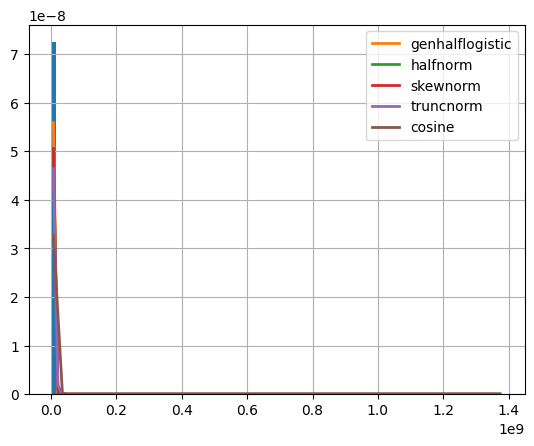

In [16]:
from fitter import Fitter, get_distributions
data = data[data["Price"].notnull()]

fitter = Fitter(
    data["Price"],
    distributions=get_distributions()  # Ajustar a las distribuciones más comunes
)
fitter.fit()
fitter.summary()

## Histograma del precio

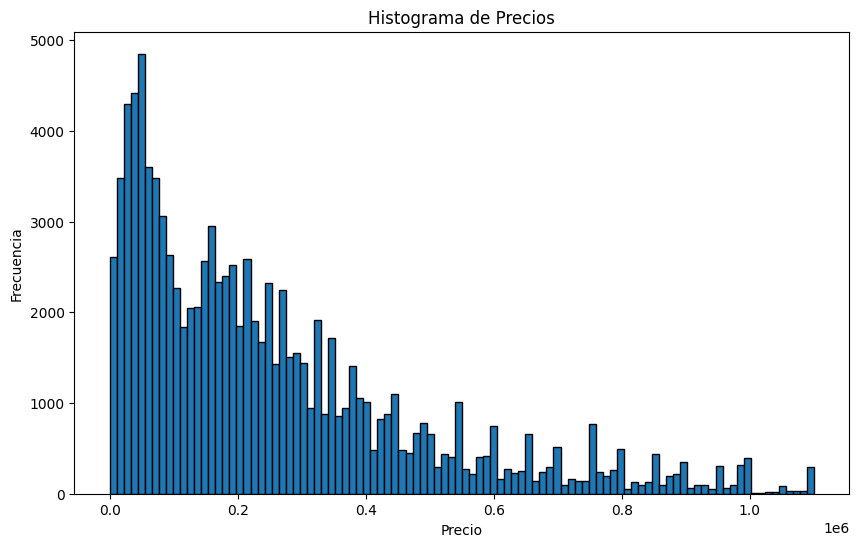

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(data_reduced['Price'], bins = 100 , edgecolor='black')  # Ajusta el número de bins según lo que necesites
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

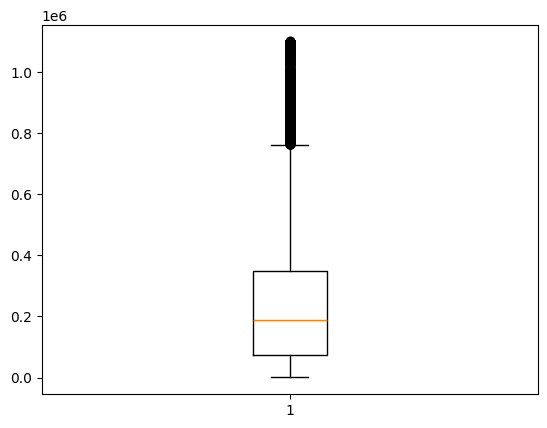

In [18]:
plt.boxplot(data_reduced["Price"])
plt.show()

## Simetrías y estadísticos

In [19]:
from scipy.stats import skew

media = data["Price"].mean()
mediana = data["Price"].median()
asimetria = skew(data["Price"])

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Asimetría (Skewness): {asimetria}")


Media: 369683.92854787805
Mediana: 199900.0
Asimetría (Skewness): 317.4386724268403


conclusones

## Q-Q Plot

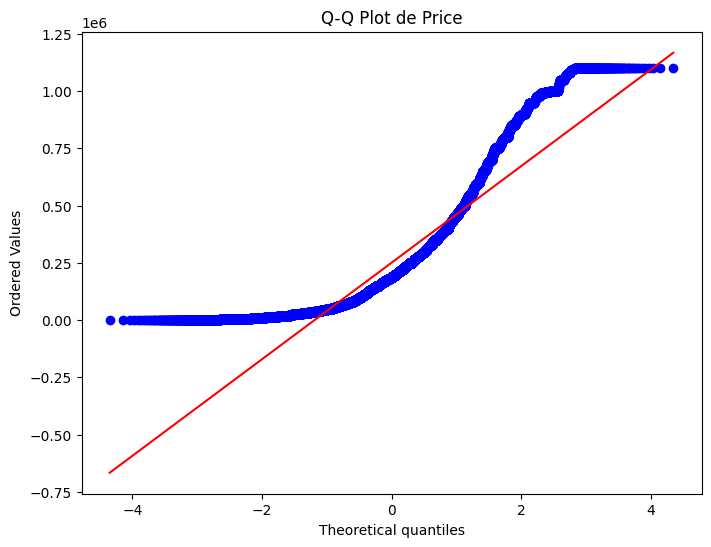

In [20]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data_reduced["Price"], dist="norm", plot=plt)
plt.title("Q-Q Plot de Price")
plt.show()


In [21]:
from scipy.stats import shapiro

stat, p = shapiro(data["Price"])
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}")

if p > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los datos no siguen una distribución normal (se rechaza H0).")


Estadístico de Shapiro-Wilk: 0.012576300965830733, p-valor: 2.931015925925355e-186
Los datos no siguen una distribución normal (se rechaza H0).


/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 108035.
  res = hypotest_fun_out(*samples, **kwds)


# Estimación puntual y por intervalos 

Tras el estudio de la normalidad realizaremos una estimación puntual y por intervalos del precio

Comenzaremos con estimaciones puntuales de la media poblacional con la media muestral

In [22]:
precio_data = data_reduced["Price"]
media_precio = precio_data.mean()
mediana_precio = precio_data.median()
desviacion_estandar_precio = precio_data.std(ddof=1)

print("Media:", media_precio)
print("Mediana:", mediana_precio)
print("Desviación estandar:", desviacion_estandar_precio)


Media: 250596.72141205383
Mediana: 189000.0
Desviación estandar: 227114.79553743007


Ahora nuestro objetivo es estudiar la media de la muetra, obteniendo un intervalo de confianza en el cual nosotros podamos confiar que se encuentre la media real.

Como ya sabemos, al diponer de una muestra grande, podremos tratar la media de una muestra como una distribucion normal.

In [42]:
sample_size = data_reduced["Price"].shape[0]
sample_mean = data_reduced["Price"].mean()

nivel_confianza = 0.95

z_critical = stats.norm.ppf(q = ((1 + nivel_confianza) / 2))  # Get the z-critical value*
print("z-critical value:", z_critical)

sample_stdev = data_reduced["Price"].std(ddof=1)  # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = z_critical * sigma

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Intervalo de confianza: {confidence_interval[0]:.3f}€ - {confidence_interval[1]:.3f}€")

z-critical value: 1.959963984540054
Intervalo de confianza: 249203.913€ - 251989.530€


El intervalo de confianza que obtenemos nos dice que la media de los precios reales se encontrará entre 249913.794€ - 252618.915€ en un 95% de confianza

# Realización de contrastes de hipótesis oportunos para realizar inferencia con los datos

- precio más bajo de los garages que del grupo? 
- Son los precios de los apartaementos similares a building?

# ANOVA

Dado que nuestra variable no sigue una distribución normal y estamos comparando más de dos grupos, podemos utilizar la prueba de Kruskal-Wallis. Esta prueba no paramétrica es una excelente alternativa al ANOVA, ya que permite evaluar si existen diferencias significativas entre más de dos grupos sin asumir que los datos siguen una distribución normal. La prueba de Kruskal-Wallis se basa en los rangos de los datos y es especialmente útil para variables ordinales o continuas que no cumplen con los supuestos de normalidad.

### ¿Hay diferencia significativa de precio entre los tipo: Mansion, Manor, State y Hotel? CAMBIAR

In [31]:
# Suponiendo que tienes los datos divididos en grupos
P_Mansion = data_reduced[data_reduced['Type'] == 'Apartment']['Price']
P_Hotel = data_reduced[data_reduced['Type'] == 'House']['Price']
P_Manor= data_reduced[data_reduced['Type'] == 'Land']['Price']
P_State = data_reduced[data_reduced['Type'] == 'Store']['Price']
# Realizar la prueba de Kruskal-Wallis

stat, p_value = stats.kruskal(P_Mansion, P_Hotel, P_Manor, P_State)
print(f'Estadística de prueba: {stat}, Valor p: {p_value}')


Estadística de prueba: 26114.56364674622, Valor p: 0.0


posttok

La estadística de prueba de Kruskal-Wallis (483.73) es bastante alta. En una prueba de Kruskal-Wallis, una estadística de prueba más alta indica que existe una diferencia significativa entre al menos uno de los grupos en comparación con los otros. En este caso, el valor elevado de la estadística sugiere una fuerte evidencia de que las medianas de los precios no son iguales entre los tres grupos (Mansion, Building, y Farm).



In [25]:

# ANÁLISIS ANOVA
import pandas as pd
from scipy.stats import f_oneway

# Asegúrate de que 'Type' está en las columnas
if 'Type' in data_reduced.columns:
    # Identificar variables categórica y numéricas
    category_col = 'Type'  # Columna categórica
    numerical_cols = data_reduced.select_dtypes(include=['float64', 'int64']).columns

    # Imprimir resultados de ANOVA
    print("Resultados del análisis ANOVA:")
    for col in numerical_cols:
        # Agrupar datos por categoría
        grupos = [data_reduced[col][data_reduced[category_col] == grupo] for grupo in data_reduced[category_col].unique()]
        anova_result = f_oneway(*grupos)
        print(f"Variable: {col} - Estadístico F: {anova_result.statistic:.4f}, p-valor: {anova_result.pvalue:.4e}")
else:
    print("La columna 'Type' no está disponible para realizar el análisis ANOVA.")


/var/folders/jr/_dyjstd10fx0jjbz81clpyrh0000gn/T/ipykernel_5872/1770935358.py:16: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(*grupos)


Resultados del análisis ANOVA:
Variable: Price - Estadístico F: nan, p-valor: nan
Variable: Parking - Estadístico F: nan, p-valor: nan
Variable: ConstructionYear - Estadístico F: nan, p-valor: nan
Variable: TotalArea - Estadístico F: nan, p-valor: nan
Variable: GrossArea - Estadístico F: nan, p-valor: nan
Variable: TotalRooms - Estadístico F: nan, p-valor: nan
Variable: NumberOfBedrooms - Estadístico F: nan, p-valor: nan
Variable: NumberOfWC - Estadístico F: nan, p-valor: nan
Variable: LivingArea - Estadístico F: nan, p-valor: nan
Variable: LotSize - Estadístico F: nan, p-valor: nan
Variable: BuiltArea - Estadístico F: nan, p-valor: nan
Variable: NumberOfBathrooms - Estadístico F: nan, p-valor: nan
